# Reto Titanic


Adriana Inés López Sánchez  A01656937

María José Mendoza Muñiz A01652137

Lidia Paola Díaz Ramírez A01369117

In [28]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 
%cd "/content/gdrive/My Drive/IA/reto"
!ls  # show current directory

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content
[Errno 2] No such file or directory: '/content/gdrive/My Drive/IA/reto'
/content
gdrive	sample_data


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scipy import stats
import seaborn as sns
df = pd.read_csv('sample_data/train.csv')

## Exploración de datos

In [30]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**0   PassengerId:** int64 -> categorica

**1   Survive:** int64 -> booleana (0 = No, 1= Yes)

**2   Pclass:** int64 -> categorica

**3   Name:** object -> categorica

**4   Sex:** object -> categorica

**5   Age:** float64 -> numerica

**6   SibSp:** int64 -> numerica (#siblings/ or spouses)

**7   Parch:** int64 -> numerica (#parents/children)

**8   Ticket:** object -> categorica

**9   Fare:** float64 -> numerica

**10  Cabin:** object -> categorica

**11  Embarked:** object -> categorica (puerto C= Cherbourg, Q= Queenstown, S= South Hampton

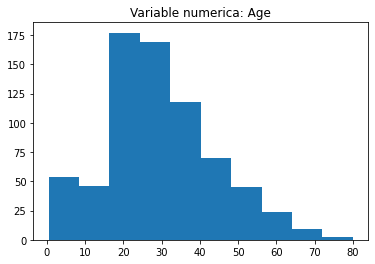

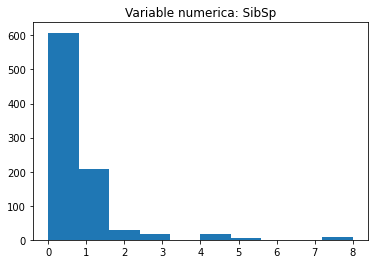

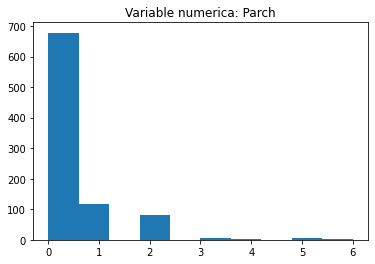

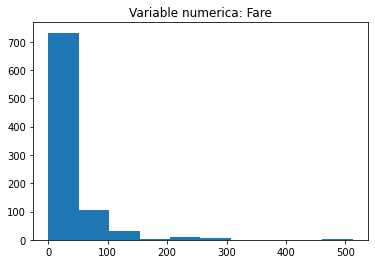

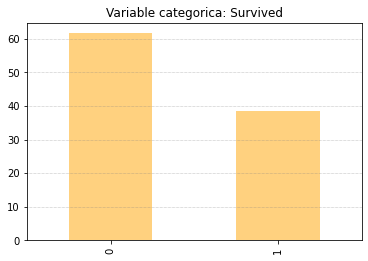

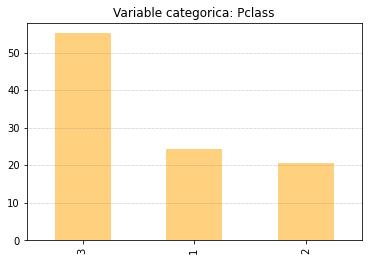

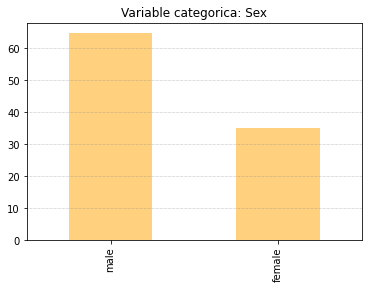

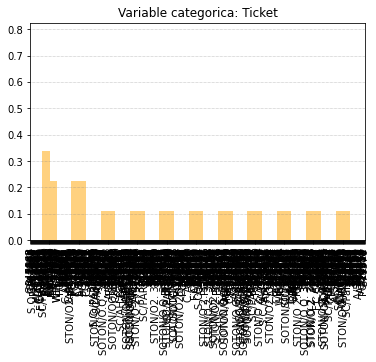

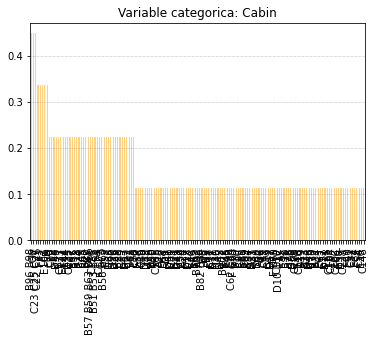

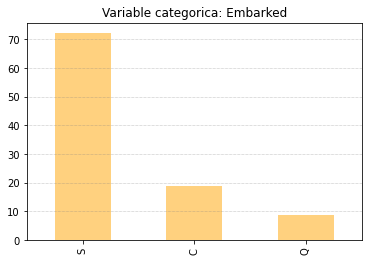

In [32]:
numericas = df[["Age", "SibSp", "Parch", 
             "Fare"]]

#Sin considerar los nombres y cabinas
categoricas0 = df[['Survived','Pclass','Sex', 'Ticket', 'Cabin', 'Embarked']]

for i in numericas:
  plt.hist(df[i])
  plt.title("Variable numerica: "+i)
  plt.show()

# Para entender el comportamiento de una variable categorica
# también necesitamos graficarla.
for i in categoricas0:
  ((df[i].value_counts()/df.shape[0])*100).plot(kind='bar',
                                                      color = 'orange',
                                                      alpha = 0.5)
  plt.grid(True, color = "grey", lw = 0.5, ls = ":", axis = 'y')
  plt.title("Variable categorica: "+i)
  plt.show()

In [33]:
print(100*df.isnull().mean())

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


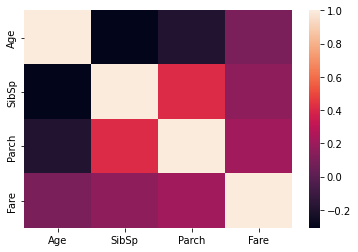

In [34]:
print(numericas.corr())
sns.heatmap(numericas.corr())

In [35]:
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Cantidad de atipicos en Age es: 11 
 En porcentajes:  1.23 
 Rango intercuartil: 17.875
Cantidad de atipicos en Age es: 0 
 En porcentajes:  0.0 
 Rango intercuartil: 18.0


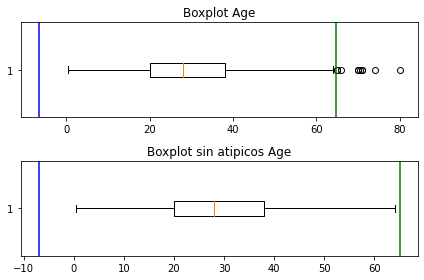

Cantidad de atipicos en SibSp es: 46 
 En porcentajes:  5.16 
 Rango intercuartil: 1.0
Cantidad de atipicos en SibSp es: 0 
 En porcentajes:  0.0 
 Rango intercuartil: 1.0


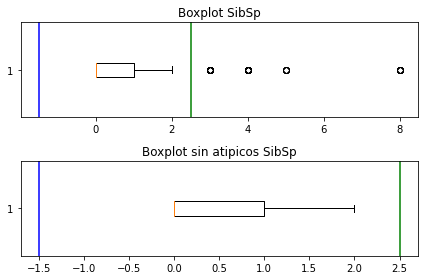

Cantidad de atipicos en Parch es: 213 
 En porcentajes:  23.91 
 Rango intercuartil: 0.0
Cantidad de atipicos en Parch es: 0 
 En porcentajes:  0.0 
 Rango intercuartil: 0.0


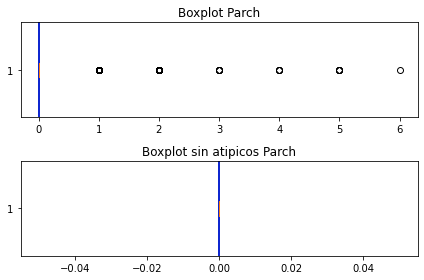

Cantidad de atipicos en Fare es: 116 
 En porcentajes:  13.02 
 Rango intercuartil: 23.0896
Cantidad de atipicos en Fare es: 25 
 En porcentajes:  2.81 
 Rango intercuartil: 18.1042


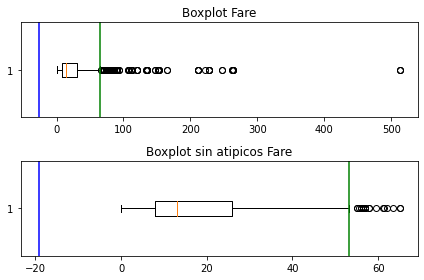

In [36]:
# Datos atipicos

for i in numericas:
  #dada la muestra calculamos los valores que se usan
  # Para ello usamos los datos y la funcion percentil de numpy
  plt.subplot(2,1,1)
  x = df[i][~df[i].isnull()]
  Q_3 = np.percentile(x, 75)
  Q_1 = np.percentile(x, 25)
  IQR = Q_3 - Q_1
  lim_sup = Q_3 + 1.5*IQR
  lim_inf = Q_1 - 1.5*IQR
  #Vamos a dibujarla
  plt.boxplot(x, vert = False)
  plt.axvline(lim_sup, color = 'green')
  plt.axvline(lim_inf, color = 'blue')
  plt.title("Boxplot "+i)
  atipicos = len(x.loc[(x < lim_inf)]) + len(x.loc[(x > lim_sup)])
  print("Cantidad de atipicos en",i,"es:",
        atipicos ,"\n",
        "En porcentajes: ",
        np.round(100*atipicos/len(df),2),"\n",
        "Rango intercuartil:", IQR)
  
  plt.subplot(2,1,2)
  y = x.loc[(x >= lim_inf) & (x <= lim_sup)]
  Q_3 = np.percentile(y, 75)
  Q_1 = np.percentile(y, 25)
  IQR = Q_3 - Q_1
  lim_sup = Q_3 + 1.5*IQR
  lim_inf = Q_1 - 1.5*IQR
  #Vamos a dibujarla
  plt.boxplot(y, vert = False)
  plt.axvline(lim_sup, color = 'green')
  plt.axvline(lim_inf, color = 'blue')
  plt.title("Boxplot sin atipicos "+i)
  atipicos = len(y.loc[(y < lim_inf)]) + len(y.loc[(y> lim_sup)])
  print("Cantidad de atipicos en",i,"es:",
        atipicos ,"\n",
        "En porcentajes: ",
        np.round(100*atipicos/len(df),2),"\n",
        "Rango intercuartil:" ,IQR)
  # Graficas
  plt.tight_layout()
  plt.show()


In [37]:
# y = np.where(df['Survived'] == '0'), 'No', 'Yes')
df['Survived2'] = np.where(df['Survived'] == 1, 'Yes', 'No')
# print(df.Survived, df.Survived2)

In [38]:
print(pd.pivot_table(df, index = 'Survived2', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived2', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived2', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived2', columns = 'Age', values = 'Ticket' ,aggfunc ='count'))
print()
# print(pd.pivot_table(df, index = 'Survived2', columns = 'Fare', values = 'Ticket' ,aggfunc ='count'))

Pclass       1   2    3
Survived2              
No          80  97  372
Yes        136  87  119

Sex        female  male
Survived2              
No             81   468
Yes           233   109

Embarked    C   Q    S
Survived2             
No         75  47  427
Yes        93  30  217

Age        0.42   0.67   0.75   0.83   0.92   1.00   2.00   3.00   4.00   \
Survived2                                                                  
No           NaN    NaN    NaN    NaN    NaN    2.0    7.0    1.0    3.0   
Yes          1.0    1.0    2.0    2.0    1.0    5.0    3.0    5.0    7.0   

Age        5.00   ...  62.00  63.00  64.00  65.00  66.00  70.00  70.50  71.00  \
Survived2         ...                                                           
No           NaN  ...    2.0    NaN    2.0    3.0    1.0    2.0    1.0    2.0   
Yes          4.0  ...    2.0    2.0    NaN    NaN    NaN    NaN    NaN    NaN   

Age        74.00  80.00  
Survived2                
No           1.0    NaN  
Yes  

In [39]:
pd.pivot_table(df, index = 'Survived2', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived2,,,,
No,30.626179,22.117887,0.329690,0.553734
Yes,28.343690,48.395408,0.464912,0.473684


## Procesamiento de datos

In [71]:
train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')
forest_prediction = pd.DataFrame(test['PassengerId'])
logR_prediction = pd.DataFrame(test['PassengerId']) 

train.dropna()
test.dropna()

y_train = train['Survived']
x_train = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare','PassengerId'], axis=1)

x_test = test.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Fare', 'PassengerId'], axis=1)

x_train['Sex'].loc[x_train['Sex'] == 'male'] = 1
x_train['Sex'].loc[x_train['Sex'] == 'female'] = 0
x_train['Age'] = x_train['Age'].fillna(30)

x_test['Sex'].loc[x_test['Sex'] == 'male'] = 1
x_test['Sex'].loc[x_test['Sex'] == 'female'] = 0
x_test['Age'] = x_test['Age'].fillna(30)

x_test.dropna()

x_train.dropna()
print(x_train)

     Pclass Sex   Age  SibSp  Parch
0         3   1  22.0      1      0
1         1   0  38.0      1      0
2         3   0  26.0      0      0
3         1   0  35.0      1      0
4         3   1  35.0      0      0
..      ...  ..   ...    ...    ...
886       2   1  27.0      0      0
887       1   0  19.0      0      0
888       3   0  30.0      1      2
889       1   1  26.0      0      0
890       3   1  32.0      0      0

[891 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
df = df.dropna()

In [42]:
training = pd.read_csv('sample_data/train.csv')
training['train_test'] = 1
all_data = pd.concat([training])
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

     PassengerId  Survived Pclass  \
0              1         0      3   
1              2         1      1   
2              3         1      3   
3              4         1      1   
4              5         0      3   
..           ...       ...    ...   
886          887         0      2   
887          888         1      1   
888          889         0      3   
889          890         1      1   
890          891         0      3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
88

(889,)

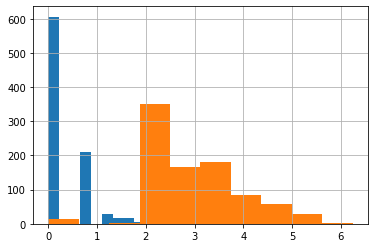

In [43]:
#impute valores nulos para datos continuos
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

#drop null 'embarked' filas. Solo 2 instancias de esto en entrenamiento training 
all_data.dropna(subset=['Embarked'],inplace = True)

#norma de registro de sibsp (no se usa)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# registro norma de fare
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# fare convertida a categoría para pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#variables dummy creadas a partir de categorías
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','train_test']])


X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)

print(all_data)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

In [44]:
#Scale data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
print(all_dummies_scaled)
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

      Age  SibSp  Parch  norm_fare  train_test  Pclass_1  Pclass_2  Pclass_3  \
0    22.0      1      0   2.110213           1         0         0         1   
1    38.0      1      0   4.280593           1         1         0         0   
2    26.0      0      0   2.188856           1         0         0         1   
3    35.0      1      0   3.990834           1         1         0         0   
4    35.0      0      0   2.202765           1         0         0         1   
..    ...    ...    ...        ...         ...       ...       ...       ...   
886  27.0      0      0   2.639057           1         0         1         0   
887  19.0      0      0   3.433987           1         1         0         0   
888  28.0      1      2   3.196630           1         0         0         1   
889  26.0      0      0   3.433987           1         1         0         0   
890  32.0      0      0   2.169054           1         0         0         1   

     Sex_female  Sex_male  Embarked_C  

In [45]:
#TEST

training = pd.read_csv('sample_data/test.csv')
training['test_test'] = 1
all_data = pd.concat([training])
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'test_test'],
      dtype='object')

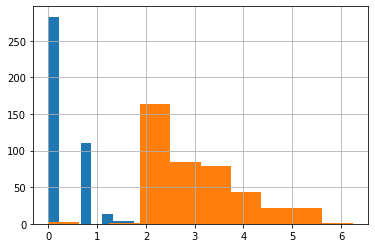

In [46]:
#TEST

#impute valores nulos para datos continuos
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

#drop null 'embarked' filas. Solo 2 instancias de esto en entrenamiento training 
all_data.dropna(subset=['Embarked'],inplace = True)

#norma de registro de sibsp (no se usa)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# registro norma de fare
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# fare convertida a categoría para pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#variables dummy creadas a partir de categorías
#all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','train_test']])
all_dummies = pd.get_dummies(all_data[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'test_test']])



X_test = all_dummies[all_dummies.test_test == 1].drop(['test_test'], axis =1)


In [47]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
print(all_dummies_scaled)
all_dummies_scaled[['Age','SibSp','Parch','Fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','Fare']])
all_dummies_scaled

X_test_scaled = all_dummies_scaled[all_dummies_scaled.test_test == 1].drop(['test_test'], axis =1)

      Age  SibSp  Parch      Fare  test_test  Pclass_1  Pclass_2  Pclass_3  \
0    34.5      0      0    7.8292          1         0         0         1   
1    47.0      1      0    7.0000          1         0         0         1   
2    62.0      0      0    9.6875          1         0         1         0   
3    27.0      0      0    8.6625          1         0         0         1   
4    22.0      1      1   12.2875          1         0         0         1   
..    ...    ...    ...       ...        ...       ...       ...       ...   
413  27.0      0      0    8.0500          1         0         0         1   
414  39.0      0      0  108.9000          1         1         0         0   
415  38.5      0      0    7.2500          1         0         0         1   
416  27.0      0      0    8.0500          1         0         0         1   
417  27.0      1      1   22.3583          1         0         0         1   

     Name_Abbott, Master. Eugene Joseph  Name_Abelseth, Miss. K

Modelos

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


## Modelo 1: Regresión Logística


In [49]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.70786517 0.76404494 0.78089888 0.79213483 0.8079096 ]
0.7705706849488987


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


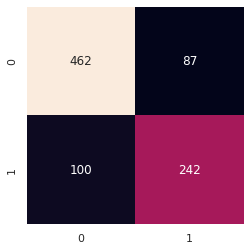

In [89]:
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()
y_trained = lr.fit(x_train.values, y_train.values)
y_trains = lr.predict(x_train)
y_preds = lr.predict(x_test)
mat = confusion_matrix(y_train, y_trains)
sns.set()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)

0.7901234567901234


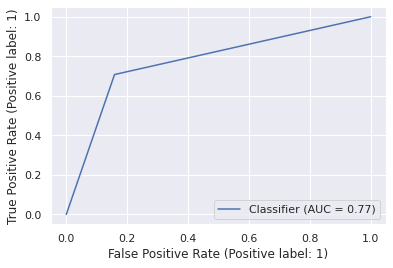

In [54]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, accuracy_score
RocCurveDisplay.from_predictions(y_train, y_trains)
print(accuracy_score(y_train, y_trains))

In [55]:
import pickle
pickle.dump(lr, open('LR.pkl','wb'))

## Modelo 2: Árboles de decisiones

In [80]:
rf = RandomForestClassifier(random_state = 1)
#train a test
#cv = cross_val_score(rf,X_test,y_test,cv=5)
#print(cv)
#print(cv.mean())

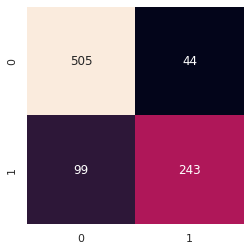

In [81]:
arbol = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators=100, max_samples=0.07, random_state=42).fit(x_train, y_train)
forest.fit(x_train, y_train)

# cambiioooooooo
f_predict = forest.predict(x_train)
mat = confusion_matrix(y_train, f_predict)
sns.set()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)

0.8395061728395061


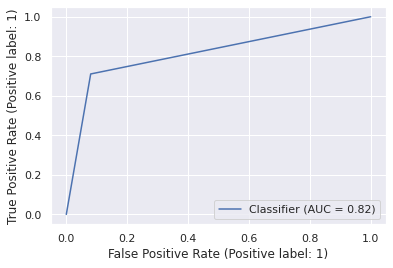

In [82]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, accuracy_score
RocCurveDisplay.from_predictions(y_train, f_predict)
print(accuracy_score(y_train, f_predict))

In [83]:
import pickle
pickle.dump(forest, open('RF.pkl','wb'))

In [90]:
lr.predict([[3,0,25,0,0]])

array([1])

In [85]:
pred_forest = forest.predict(x_test)

forest_prediction['Survived'] = pred_forest
compression_opts = dict(method='zip',
                        archive_name='tree.csv')  
forest_prediction.to_csv('tree.zip', index=False,
          compression=compression_opts)  


In [91]:
pred_logR = lr.predict(x_test)

logR_prediction['Survived'] = pred_logR
compression_opts = dict(method='zip',
                        archive_name='logR.csv')  
logR_prediction.to_csv('logR.zip', index=False,
          compression=compression_opts)  


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [96]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [100]:
lr = LogisticRegression()
lr.fit(x_train.values, y_train.values)
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(x_train.values, y_train.values)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.7979662293641328
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [102]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(x_train.values, y_train.values)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

Random Forest
Best Score: 0.8249576297784195
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 450}


In [107]:
from sklearn.ensemble import VotingClassifier

best_lr = best_clf_lr.best_estimator_
best_rf = best_clf_rf.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('rf',best_rf)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('rf',best_rf)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('rf',best_rf),('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('rf',best_rf),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,x_train.values, y_train.values,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,x_train.values, y_train.values,cv=5).mean())
print('voting_clf_soft :',cross_val_score(voting_clf_soft,x_train.values, y_train.values,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,x_train.values, y_train.values,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,x_train.values, y_train.values,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,x_train.values, y_train.values,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,x_train.values, y_train.values,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,x_train.values, y_train.values,cv=5).mean())

voting_clf_hard : [0.7877095  0.82022472 0.83707865 0.82022472 0.85955056]
voting_clf_hard mean : 0.8249576297784195
voting_clf_soft : [0.7877095  0.82022472 0.83707865 0.82022472 0.85955056]
voting_clf_soft mean : 0.8249576297784195
voting_clf_all : [0.81005587 0.82022472 0.82022472 0.79775281 0.83707865]
voting_clf_all mean : 0.8170673529596385
voting_clf_xgb : [0.81005587 0.82022472 0.82022472 0.79775281 0.83707865]
voting_clf_xgb mean : 0.8170673529596385
